<a href="https://colab.research.google.com/github/77Fayy/AirbnbDataset/blob/main/airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# the libraries we use it
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np



In [ ]:
# reading file
dataframe = pd.read_csv('/content/drive/MyDrive/Listings 3.csv',encoding = 'cp437')
dataframe2 = pd.read_csv('/content/drive/MyDrive/Reviews2.csv', encoding = 'cp437')



<ipython-input-3-4871e99a06af>:2: DtypeWarning: Columns (5,13) have mixed types. Specify dtype option on import or set low_memory=False.
  dataframe = pd.read_csv('/content/drive/MyDrive/Listings 3.csv',encoding = 'cp437')


In [ ]:

print(dataframe)
print(dataframe2)


In [ ]:
print(dataframe.info())
print(dataframe2.info())

In [ ]:
# take the first five rwos random
dataframe.head()

,listing_id,name,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,...,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
0,281420,"Beautiful Flat in le Village Montmartre, Paris",1466919,2011-12-03,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
1,3705183,39 m╨ôΓÇÜ╨Æ╨å Paris (Sacre C╨ôΓÇª╨▓╨é╤Üur),10328771,2013-11-29,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
2,4082273,"Lovely apartment with Terrace, 60m2",19252768,2014-07-31,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
3,4797344,Cosy studio (close to Eiffel tower),10668311,2013-12-17,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
4,4823489,Close to Eiffel Tower - Beautiful flat : 2 rooms,24837558,2014-12-14,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f


In [ ]:
# reprocessing listing
dataframe['host_since'] = pd.to_datetime(dataframe['host_since'])

dataframe[['listing_id','host_id', 'host_total_listings_count','latitude','longitude','accommodates','bedrooms','price','minimum_nights','maximum_nights','review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value']] = dataframe[['listing_id','host_id', 'host_total_listings_count','latitude','longitude','accommodates','bedrooms','price','minimum_nights','maximum_nights','review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value']].apply(pd.to_numeric)

dataframe[['name','host_location','neighbourhood','city','property_type','room_type','amenities']] = dataframe[['name','host_location','neighbourhood','city','property_type','room_type','amenities']].astype(str)

dataframe[['host_is_superhost','host_has_profile_pic','host_identity_verified','instant_bookable']] = dataframe[['host_is_superhost','host_has_profile_pic','host_identity_verified','instant_bookable']].astype(bool)

dataframe

# reprocessing review
dataframe2['date'] = pd.to_datetime(dataframe2['date'])
dataframe2[['listing_id','review_id','reviewer_id']] = dataframe2[['listing_id','review_id','reviewer_id']].apply(pd.to_numeric)

dataframe2

In [ ]:
# check if i have missing value
dataframe2.isnull().any()

listing_id     False
review_id      False
date           False
reviewer_id    False
dtype: bool

In [ ]:
# check if i have missing value
dataframe.isnull().any()


listing_id                     False
name                           False
host_id                        False
host_since                      True
host_location                  False
host_response_time              True
host_response_rate              True
host_acceptance_rate            True
host_is_superhost              False
host_total_listings_count       True
host_has_profile_pic           False
host_identity_verified         False
neighbourhood                  False
district                        True
city                           False
latitude                       False
longitude                      False
property_type                  False
room_type                      False
accommodates                   False
bedrooms                        True
amenities                      False
price                          False
minimum_nights                 False
maximum_nights                 False
review_scores_rating            True
review_scores_accuracy          True
r

In [ ]:
# sum the number of missing value
dataframe.isnull().sum()


listing_id                          0
name                                0
host_id                             0
host_since                        165
host_location                       0
host_response_time             128782
host_response_rate             128782
host_acceptance_rate           113087
host_is_superhost                   0
host_total_listings_count         165
host_has_profile_pic                0
host_identity_verified              0
neighbourhood                       0
district                       242700
city                                0
latitude                            0
longitude                           0
property_type                       0
room_type                           0
accommodates                        0
bedrooms                        29435
amenities                           0
price                               0
minimum_nights                      0
maximum_nights                      0
review_scores_rating            91405
review_score

In [ ]:
# we did Feature Engineering
# we add new column that count how many time the hotel booked
dataframe['Number of booking times'] = dataframe.groupby('listing_id')['listing_id'].transform('count')
dataframe

,listing_id,name,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,...,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,Number of booking times
0,281420,"Beautiful Flat in le Village Montmartre, Paris",1466919,2011-12-03,"Paris, Ile-de-France, France",NaN,NaN,NaN,True,1.0,...,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,True,1
1,3705183,39 m╨ôΓÇÜ╨Æ╨å Paris (Sacre C╨ôΓÇª╨▓╨é╤Üur),10328771,2013-11-29,"Paris, Ile-de-France, France",NaN,NaN,NaN,True,1.0,...,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,True,1
2,4082273,"Lovely apartment with Terrace, 60m2",19252768,2014-07-31,"Paris, Ile-de-France, France",NaN,NaN,NaN,True,1.0,...,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,True,1
3,4797344,Cosy studio (close to Eiffel tower),10668311,2013-12-17,"Paris, Ile-de-France, France",NaN,NaN,NaN,True,1.0,...,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,True,1
4,4823489,Close to Eiffel Tower - Beautiful flat : 2 rooms,24837558,2014-12-14,"Paris, Ile-de-France, France",NaN,NaN,NaN,True,1.0,...,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,True,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279707,38338635,Appartement T2 neuf pr╨ô╤ô╨Æ╨üs du tram T3a Po...,31161181,2015-04-13,"Paris, Ile-de-France, France",NaN,NaN,NaN,True,1.0,...,7,100.0,10.0,10.0,10.0,10.0,10.0,10.0,True,1
279708,38538692,Cozy Studio in Montmartre,10294858,2013-11-27,"Paris, Ile-de-France, France",NaN,NaN,NaN,True,1.0,...,15,100.0,10.0,10.0,10.0,10.0,10.0,10.0,True,1
279709,38683356,Nice and cosy mini-appartement in Paris,2238502,2012-04-27,"Paris, Ile-de-France, France",NaN,NaN,NaN,True,1.0,...,30,100.0,10.0,10.0,10.0,10.0,10.0,10.0,True,1
279710,39659000,Charming apartment near Rue Saint Maur / Oberk...,38633695,2015-07-16,"Paris, Ile-de-France, France",NaN,NaN,NaN,True,1.0,...,18,100.0,10.0,10.0,10.0,10.0,10.0,10.0,True,1


In [ ]:
# here we did aggregation
dataframe.describe()

,listing_id,host_id,host_response_rate,host_acceptance_rate,host_total_listings_count,latitude,longitude,accommodates,bedrooms,price,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,Number of booking times
count,2.797120e+05,2.797120e+05,150930.000000,166625.000000,279547.000000,279712.000000,279712.000000,279712.000000,250277.000000,279712.000000,279712.000000,2.797120e+05,188307.000000,187999.000000,188047.000000,187941.000000,188025.000000,187937.000000,187927.000000,279712.0
mean,2.638196e+07,1.081658e+08,0.865939,0.827168,24.581612,18.761862,12.595075,3.288736,1.515509,608.792737,8.050967,2.755860e+04,93.405195,9.565476,9.312869,9.701534,9.698593,9.633994,9.335364,1.0
std,1.442576e+07,1.108570e+08,0.283744,0.289202,284.041143,32.560343,73.081309,2.133379,1.153080,3441.826611,31.518946,7.282875e+06,10.070437,0.990878,1.146072,0.867434,0.886884,0.833234,1.042625,0.0
min,2.577000e+03,1.822000e+03,0.000000,0.000000,0.000000,-34.264400,-99.339630,0.000000,1.000000,0.000000,1.000000,1.000000e+00,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.0
25%,1.384462e+07,1.720656e+07,0.900000,0.780000,1.000000,-22.964390,-43.198040,2.000000,1.000000,75.000000,1.000000,4.500000e+01,91.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,1.0
50%,2.767098e+07,5.826911e+07,1.000000,0.980000,1.000000,40.710785,2.382780,2.000000,1.000000,150.000000,2.000000,1.125000e+03,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.0
75%,3.978485e+07,1.832853e+08,1.000000,1.000000,4.000000,41.908610,28.986730,4.000000,2.000000,474.000000,5.000000,1.125000e+03,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.0
max,4.834353e+07,3.901874e+08,1.000000,1.000000,7235.000000,48.904910,151.339810,16.000000,50.000000,625216.000000,9999.000000,2.147484e+09,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.0


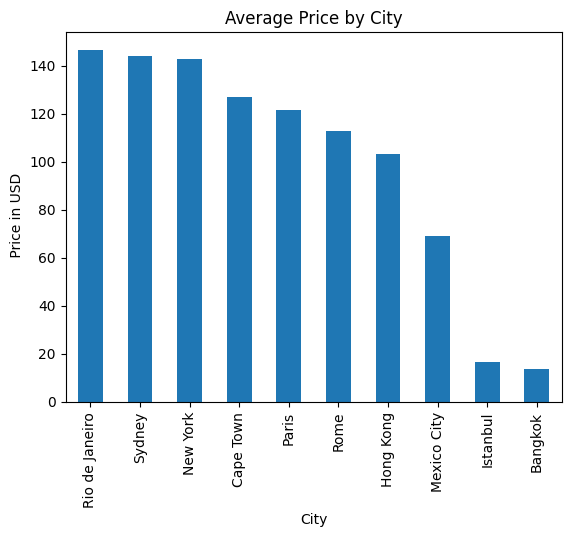

In [ ]:
# we want to know average price for each city so we did dicinory to transform the price into dollar and make sure the result is clear and wright
prices_in_dollar = {
    'Cape Town' : 0.052755412 ,
    'Bangkok': 0.0065939574,
    'Mexico City': 0.060094177 ,
    'Hong Kong': 0.13830143,
    'Rio de Janeiro': 0.19743832,
    'Istanbul': 0.031067187,
    'Sydney': 0.64861019,
    'New York': 1.0,
    'Paris': 1.0741694 ,
    'Rome': 1.0742061
}
dataframe['price_dollar'] = dataframe['price'] * dataframe['city'].map(prices_in_dollar)
avg_price = dataframe.groupby('city')['price_dollar'].mean()
avg_price_dollar = avg_price.sort_values(ascending=False)
avg_price_dollar.plot(kind='bar')
plt.title('Average Price by City')
plt.xlabel('City')
plt.ylabel(' Price in USD')
plt.show()

In [ ]:
dataframe['city'].value_counts()

Paris             64690
New York          37012
Sydney            33630
Rome              27647
Rio de Janeiro    26615
Istanbul          24519
Mexico City       20065
Bangkok           19361
Cape Town         19086
Hong Kong          7087
Name: city, dtype: int64

<Axes: xlabel='city'>

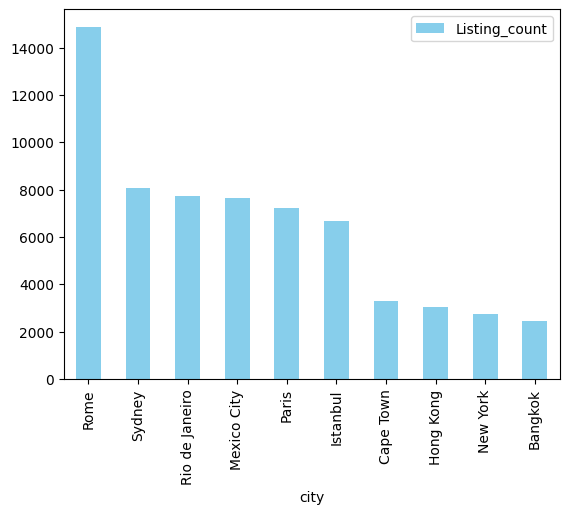

In [ ]:
# we want to know the number of booking for each city
bookings_count = dataframe.groupby(['city', 'neighbourhood'])['listing_id'].count().reset_index()
bookings_count.rename(columns={'listing_id': 'Listing_count'}, inplace=True)

max_index = bookings_count.groupby('city')['Listing_count'].idxmax().values
max_one = bookings_count.loc[max_index]

max_one.sort_values(by='Listing_count', ascending=False, inplace=True)

max_one.plot(kind='bar', x='city', y='Listing_count', color = 'skyblue')


In [ ]:
dataframe['room_type'].value_counts()

Entire place    182005
Private room     86988
Hotel room        5857
Shared room       4862
Name: room_type, dtype: int64

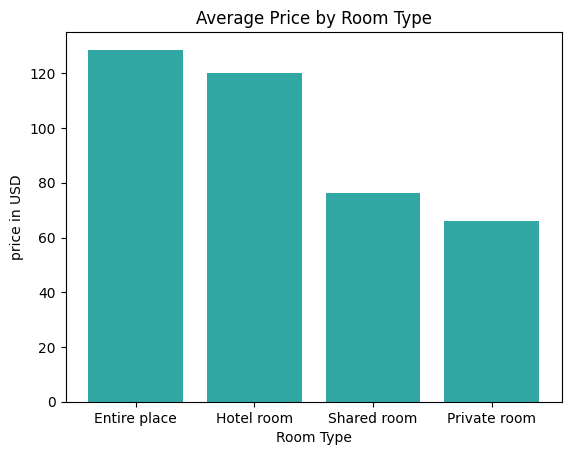

In [ ]:
# is the Room type affect the price?

avgprice_by_roomtype = dataframe.groupby('room_type')['price_dollar'].mean().reset_index()
avgprice_by_roomtype = avgprice_by_roomtype.sort_values(by='price_dollar',ascending=False)
plt.bar(avgprice_by_roomtype['room_type'], avgprice_by_roomtype['price_dollar'], color='#32a8a4')
plt.xlabel('Room Type')
plt.ylabel('price in USD')
plt.title('Average Price by Room Type')
plt.show()


In [ ]:
# conclusion
# for the data set we choce it
# first we import all libraries we need it
# then we clean the data by reproseccing all type for column
# then we did feature engineering we want to count tach hotel how many time we booked
# then we did visualization
# the first visualization we want to know the average price for each city so the result show that Rio de Janeiro has the high average and Bangkok has the lowest average
# the second visualization we want to know which city has the highest booked and the result show that rome is the highest booked and bangkok has the lowest booked
# the last visualization we want to know if the price effect by room type and result show that Entire place  has the highest average price and private room has the lowest average price